In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Classification Metrics
Accuracy: 0.00
Precision: 0.00
Recall : 0.00
F1: 0.00


C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

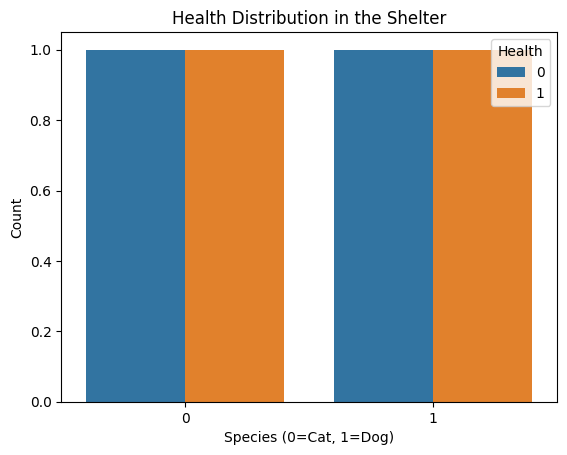

In [8]:

class Animal:
    def __init__(self, name, age, breed, health_status, species):
        self.name = name
        self.age = age
        self.breed = breed
        self.health_status = health_status
        self.species = species  # "Cat" or "Dog"

    def display_info(self):
        return f"{self.name}, a {self.age}-year-old {self.breed}, is {self.health_status}."

class Shelter(Animal):
    def __init__(self):
        self.animals = []

    def add_animal(self, name, age, breed, health_status, species):
        animal = Animal(name, age, breed, health_status, species)
        self.animals.append(animal)

    def remove_animal(self, name):
        self.animals = [a for a in self.animals if a.name != name]

    def list_animals(self):
        return self.animals

shelter = Shelter()

# Add animals (Inheritance in action!)
shelter.add_animal("Rio", 3, "Labrador", "Healthy", "Dog")
shelter.add_animal("Lucky", 5, "Siamese", "Sick", "Cat")
shelter.add_animal("Charles", 2, "Bulldog", "Sick", "Dog")
shelter.add_animal("Jess", 4, "Persian", "Healthy", "Cat")

# Convert shelter animals into a dataset
data = [[animal.name, animal.age, animal.breed, animal.health_status, animal.species] for animal in shelter.list_animals()]
df = pd.DataFrame(data, columns=["Name", "Age", "Breed", "Health", "Species"])

# Encode categorical variables for machine learning
df["Health"] = df["Health"].map({"Healthy": 1, "Sick": 0})
df["Species"] = df["Species"].map({"Dog": 1, "Cat": 0})


X = df[["Age", "Species"]]
y = df["Health"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy =accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred,average='macro')
recall =recall_score(y_test,y_pred,average='macro')
f1 =f1_score(y_test,y_pred,average='macro')

print('\nClassification Metrics')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall : {recall:.2f}')
print(f'F1: {f1:.2f}')

# Visualization: Health Distribution by Species
sns.countplot(x=df["Species"], hue=df["Health"])
plt.xlabel("Species (0=Cat, 1=Dog)")
plt.ylabel("Count")
plt.title("Health Distribution in the Shelter")
plt.show()


In [3]:
def manage_shelter(shelter):
    while True:
        print("\n Pet Shelter Management System")
        print("1. Add an Animal")
        print("2.Remove an Animal")
        print("3. View Animals in Shelter")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == "1":
            name = input("Enter animal's name: ")
            age = int(input("Enter animal's age: "))
            breed = input("Enter breed: ")
            health_status = input("Enter health status (Healthy/Sick): ")
            species = input("Enter species (Dog/Cat): ")
            shelter.add_animal(name, age, breed, health_status, species)
            print(f" {name} has been added to the shelter.")

        elif choice == "2":
            name = input("Enter the name of the animal to remove: ")
            shelter.remove_animal(name)
            print(f" {name} has been removed from the shelter.")

        elif choice == "3":
            animals = shelter.list_animals()
            if animals:
                print("\n Animals in Shelter:")
                for animal in animals:
                    print(f" {animal.display_info()}")
            else:
                print(" The shelter is empty.")

        elif choice == "4":
            print(" Exiting the program. Goodbye!")
            break
        
        else:
            print(" Invalid choice! Please enter a number from 1 to 4.")%load
shelter = Shelter()

# Start the shelter management system
manage_shelter(shelter)



 Pet Shelter Management System
1. Add an Animal
2.Remove an Animal
3. View Animals in Shelter
4. Exit


Enter your choice (1-4):  4


 Exiting the program. Goodbye!
